In [1]:
!pip install openpyxl
!pip install imbalanced-learn
!pip3 install ipympl
!pip install shapely

!pip install SciencePlots 
!pip install seaborn
!pip install tqdm

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
import os, sys
from numpy import nan
import re
import ipympl
#from IPython.core.display import display, HTML
import json
from os import listdir
import glob
import math
from IPython.display import Image, display, HTML
from shapely.geometry import mapping
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, precision_score, recall_score, mean_absolute_error, make_scorer
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, LeaveOneOut, cross_validate
from sklearn.impute import SimpleImputer
from tqdm.notebook import tqdm
from sklearn.svm import SVC
from tqdm import tqdm
import pickle
from imblearn.over_sampling import SMOTE
from scipy.stats import ks_2samp
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
np.seterr(divide='ignore', invalid='ignore')
pd.options.display.max_columns = 100
%matplotlib notebook

# Step 1: Data Acquisition

In [4]:
maize_data = pd.read_csv('maize_2018_2019_unl_spectra.csv')

mdf = maize_data

mdf.head(5)

,ID,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,...,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0.106430,0.098860,0.088910,0.077947,0.072843,0.093862,0.090015,0.070006,0.090431,0.084056,0.073512,0.073086,0.067475,0.068706,0.068850,0.063061,0.064384,0.066461,0.070936,0.078129,0.069275,0.064903,0.067154,0.065122,0.060868,0.058503,0.059176,0.060199,0.059542,0.056787,0.053711,0.056561,0.059718,0.059836,0.056556,0.059190,0.057359,0.052478,0.053686,0.054506,0.055347,0.055851,0.053617,0.055252,0.058038,0.058547,0.057006,0.056262,0.055866,...,0.056319,0.055844,0.055375,0.055058,0.054726,0.054421,0.054162,0.053836,0.053488,0.053203,0.052905,0.052548,0.052264,0.051997,0.051595,0.051157,0.050832,0.050384,0.049892,0.049764,0.049538,0.049473,0.049243,0.048725,0.048397,0.048044,0.047772,0.047821,0.047637,0.047205,0.046992,0.046813,0.046602,0.046607,0.046481,0.046230,0.045912,0.045301,0.045138,0.045353,0.045184,0.045096,0.045050,0.044625,0.044355,0.044527,0.044399,0.043810,0.043605,0.043599
1,2,0.097093,0.103140,0.083749,0.066028,0.072148,0.087739,0.098567,0.092104,0.062686,0.095519,0.107648,0.072792,0.071982,0.077794,0.071373,0.050405,0.051561,0.051083,0.053461,0.064439,0.047219,0.043872,0.056082,0.057424,0.058312,0.060843,0.060995,0.048972,0.051361,0.049914,0.036760,0.052602,0.054866,0.049009,0.052006,0.052774,0.050657,0.049641,0.054484,0.047719,0.044079,0.048591,0.048487,0.048350,0.048275,0.047974,0.048457,0.048776,0.048339,...,0.047114,0.046864,0.046694,0.046366,0.045964,0.045663,0.045325,0.045112,0.044898,0.044548,0.044306,0.044098,0.043800,0.043470,0.043094,0.042753,0.042579,0.042447,0.042235,0.042065,0.041800,0.041422,0.041198,0.041026,0.040759,0.040543,0.040383,0.040137,0.039915,0.039878,0.039731,0.039409,0.039179,0.038988,0.038808,0.038687,0.038522,0.038289,0.038160,0.038160,0.038003,0.037762,0.037672,0.037440,0.037419,0.037894,0.037886,0.037521,0.037509,0.037503
2,3,0.125163,0.124518,0.127662,0.127982,0.127173,0.115487,0.111536,0.112970,0.100015,0.079823,0.082658,0.102968,0.088516,0.094781,0.094515,0.070130,0.074827,0.079704,0.075530,0.064953,0.070498,0.072435,0.068536,0.068483,0.070248,0.065726,0.058498,0.066385,0.070785,0.069656,0.066325,0.068654,0.066584,0.063986,0.066945,0.068194,0.069426,0.069469,0.065436,0.058559,0.057705,0.061731,0.055525,0.059083,0.065252,0.065030,0.058985,0.062260,0.068849,...,0.055637,0.055295,0.055052,0.054888,0.054461,0.054179,0.054169,0.053794,0.053397,0.053165,0.052658,0.052337,0.052304,0.051942,0.051510,0.051305,0.051045,0.050822,0.050715,0.050409,0.050127,0.049959,0.049740,0.049392,0.049137,0.048937,0.048751,0.048657,0.048485,0.048162,0.048046,0.048203,0.048045,0.047810,0.047612,0.047058,0.046735,0.046689,0.046588,0.046480,0.046410,0.046467,0.046406,0.046281,0.046181,0.046085,0.045880,0.045441,0.045417,0.045704
3,4,0.101250,0.094361,0.086309,0.090478,0.107267,0.088325,0.076786,0.083318,0.080874,0.084091,0.084152,0.079871,0.085310,0.087679,0.079508,0.062870,0.059119,0.068288,0.075749,0.069223,0.066564,0.066067,0.066501,0.067355,0.066727,0.062973,0.059307,0.064315,0.064843,0.063219,0.062928,0.062292,0.062633,0.062704,0.061520,0.063693,0.063807,0.061729,0.061046,0.060998,0.061302,0.061599,0.061438,0.063316,0.064415,0.062895,0.062514,0.061758,0.062089,...,0.063220,0.062894,0.062567,0.062176,0.061807,0.061366,0.060850,0.060529,0.060285,0.059850,0.059491,0.059236,0.058814,0.058425,0.058187,0.057785,0.057324,0.057021,0.056671,0.056601,0.056302,0.055740,0.055415,0.055086,0.054752,0.054657,0.054514,0.054307,0.054005,0.053654,0.053363,0.052884,0.052615,0.052670,0.052539,0.052351,0.052190,0.051985,0.051738,0.051436,0.051306,0.051264,0.051125,0.051135,0.05

In [9]:
mdr = pd.read_csv('maize_2018_2019_unl_traits.csv')

mdr.head(2)

,ID,Nitrogen,Phosphorus,Potassium,Chlorophyll,Leaf_Dry_Weight,Leaf_Fresh_Weight,Leaf_Area
0,1,2.96,0.22,1.78,476.60,8.46,30.70,1420.57
1,2,3.11,0.48,2.74,492.17,6.69,27.55,1144.10


# Step 2: Data Preprocessing 

In [10]:
mdf.isnull().sum()
mdr.isnull().sum()

ID                   0
Nitrogen             0
Phosphorus           0
Potassium            0
Chlorophyll          0
Leaf_Dry_Weight      0
Leaf_Fresh_Weight    0
Leaf_Area            0
dtype: int64

In [11]:
print(mdf.shape)
print(mdf["ID"].max())

# Note that some id are missing in the data so we will do preprocessing to fix it ---------

(1210, 2152)
1271


In [12]:
# Missing ID's are taken care by setting the index to ID and obtaining inner join.

mf = mdf.set_index("ID")
mr = mdr.set_index("ID")

mfr = pd.merge(mf, mr, on = 'ID', how = 'inner')
mfr.head(5)

,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,...,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500,Nitrogen,Phosphorus,Potassium,Chlorophyll,Leaf_Dry_Weight,Leaf_Fresh_Weight,Leaf_Area
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.106430,0.098860,0.088910,0.077947,0.072843,0.093862,0.090015,0.070006,0.090431,0.084056,0.073512,0.073086,0.067475,0.068706,0.068850,0.063061,0.064384,0.066461,0.070936,0.078129,0.069275,0.064903,0.067154,0.065122,0.060868,0.058503,0.059176,0.060199,0.059542,0.056787,0.053711,0.056561,0.059718,0.059836,0.056556,0.059190,0.057359,0.052478,0.053686,0.054506,0.055347,0.055851,0.053617,0.055252,0.058038,0.058547,0.057006,0.056262,0.055866,0.054559,...,0.053836,0.053488,0.053203,0.052905,0.052548,0.052264,0.051997,0.051595,0.051157,0.050832,0.050384,0.049892,0.049764,0.049538,0.049473,0.049243,0.048725,0.048397,0.048044,0.047772,0.047821,0.047637,0.047205,0.046992,0.046813,0.046602,0.046607,0.046481,0.046230,0.045912,0.045301,0.045138,0.045353,0.045184,0.045096,0.045050,0.044625,0.044355,0.044527,0.044399,0.043810,0.043605,0.043599,2.96,0.22,1.78,476.60,8.46,30.70,1420.57
2,0.097093,0.103140,0.083749,0.066028,0.072148,0.087739,0.098567,0.092104,0.062686,0.095519,0.107648,0.072792,0.071982,0.077794,0.071373,0.050405,0.051561,0.051083,0.053461,0.064439,0.047219,0.043872,0.056082,0.057424,0.058312,0.060843,0.060995,0.048972,0.051361,0.049914,0.036760,0.052602,0.054866,0.049009,0.052006,0.052774,0.050657,0.049641,0.054484,0.047719,0.044079,0.048591,0.048487,0.048350,0.048275,0.047974,0.048457,0.048776,0.048339,0.047229,...,0.045112,0.044898,0.044548,0.044306,0.044098,0.043800,0.043470,0.043094,0.042753,0.042579,0.042447,0.042235,0.042065,0.041800,0.041422,0.041198,0.041026,0.040759,0.040543,0.040383,0.040137,0.039915,0.039878,0.039731,0.039409,0.039179,0.038988,0.038808,0.038687,0.038522,0.038289,0.038160,0.038160,0.038003,0.037762,0.037672,0.037440,0.037419,0.037894,0.037886,0.037521,0.037509,0.037503,3.11,0.48,2.74,492.17,6.69,27.55,1144.10
3,0.125163,0.124518,0.127662,0.127982,0.127173,0.115487,0.111536,0.112970,0.100015,0.079823,0.082658,0.102968,0.088516,0.094781,0.094515,0.070130,0.074827,0.079704,0.075530,0.064953,0.070498,0.072435,0.068536,0.068483,0.070248,0.065726,0.058498,0.066385,0.070785,0.069656,0.066325,0.068654,0.066584,0.063986,0.066945,0.068194,0.069426,0.069469,0.065436,0.058559,0.057705,0.061731,0.055525,0.059083,0.065252,0.065030,0.058985,0.062260,0.068849,0.067385,...,0.053794,0.053397,0.053165,0.052658,0.052337,0.052304,0.051942,0.051510,0.051305,0.051045,0.050822,0.050715,0.050409,0.050127,0.049959,0.049740,0.049392,0.049137,0.048937,0.048751,0.048657,0.048485,0.048162,0.048046,0.048203,0.048045,0.047810,0.047612,0.047058,0.046735,0.046689,0.046588,0.046480,0.046410,0.046467,0.046406,0.046281,0.046181,0.046085,0.045880,0.045441,0.045417,0.045704,2.94,0.39,2.45,428.91,6.16,25.15,898.15
4,0.101250,0.094361,0.086309,0.090478,0.107267,0.088325,0.076786,0.083318,0.080874,0.084091,0.084152,0.079871,0.085310,0.087679,0.079508,0.062870,0.059119,0.068288,0.075749,0.069223,0.066564,0.066067,0.066501,0.067355,0.066727,0.062973,0.059307,0.064315,0.064843,0.063219,0.062928,0.062292,0.062633,0.062704,0.061520,0.063693,0.063807,0.061729,0.061046,0.060998,0.061302,0.061599,0.061438,0.063316,0.064415,0.062895,0.062514,0.061758,0.062089,0.064964,...,0.060529,0.060285,0.059850,0.059491,0.059236,0.058814,0.058425,0.058187,0.057785,0.057324,0.057021,0.056671,0.056601,0.056302,0.055740,0.055415,0.055086,0.054752,0.054657,0.054514,0.054307,0.054005,0.053654,0.053363,0.052884,0.052615,0.052670,0.052539,0.052351,0.052190,0.051985,0.05

In [13]:
X = mfr.iloc[:, 0:2151]
X.head(2)

,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,...,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.106430,0.09886,0.088910,0.077947,0.072843,0.093862,0.090015,0.070006,0.090431,0.084056,0.073512,0.073086,0.067475,0.068706,0.068850,0.063061,0.064384,0.066461,0.070936,0.078129,0.069275,0.064903,0.067154,0.065122,0.060868,0.058503,0.059176,0.060199,0.059542,0.056787,0.053711,0.056561,0.059718,0.059836,0.056556,0.059190,0.057359,0.052478,0.053686,0.054506,0.055347,0.055851,0.053617,0.055252,0.058038,0.058547,0.057006,0.056262,0.055866,0.054559,...,0.056319,0.055844,0.055375,0.055058,0.054726,0.054421,0.054162,0.053836,0.053488,0.053203,0.052905,0.052548,0.052264,0.051997,0.051595,0.051157,0.050832,0.050384,0.049892,0.049764,0.049538,0.049473,0.049243,0.048725,0.048397,0.048044,0.047772,0.047821,0.047637,0.047205,0.046992,0.046813,0.046602,0.046607,0.046481,0.046230,0.045912,0.045301,0.045138,0.045353,0.045184,0.045096,0.045050,0.044625,0.044355,0.044527,0.044399,0.043810,0.043605,0.043599
2,0.097093,0.10314,0.083749,0.066028,0.072148,0.087739,0.098567,0.092104,0.062686,0.095519,0.107648,0.072792,0.071982,0.077794,0.071373,0.050405,0.051561,0.051083,0.053461,0.064439,0.047219,0.043872,0.056082,0.057424,0.058312,0.060843,0.060995,0.048972,0.051361,0.049914,0.036760,0.052602,0.054866,0.049009,0.052006,0.052774,0.050657,0.049641,0.054484,0.047719,0.044079,0.048591,0.048487,0.048350,0.048275,0.047974,0.048457,0.048776,0.048339,0.047229,...,0.047114,0.046864,0.046694,0.046366,0.045964,0.045663,0.045325,0.045112,0.044898,0.044548,0.044306,0.044098,0.043800,0.043470,0.043094,0.042753,0.042579,0.042447,0.042235,0.042065,0.041800,0.041422,0.041198,0.041026,0.040759,0.040543,0.040383,0.040137,0.039915,0.039878,0.039731,0.039409,0.039179,0.038988,0.038808,0.038687,0.038522,0.038289,0.038160,0.038160,0.038003,0.037762,0.037672,0.037440,0.037419,0.037894,0.037886,0.037521,0.037509,0.037503


In [14]:
yN = mfr.loc[:, 'Nitrogen']
yN.head(2)

ID
1    2.96
2    3.11
Name: Nitrogen, dtype: float64

In [15]:
yP = mfr.loc[:, 'Phosphorus']
yP.head(2)

ID
1    0.22
2    0.48
Name: Phosphorus, dtype: float64

In [16]:
yK = mfr.loc[:, 'Potassium']
yK.head(2)

ID
1    1.78
2    2.74
Name: Potassium, dtype: float64

# Step 3:  Train-Test Split  and its Goodness

In [92]:
# rand_st = 0
tst_siz = 0.3

# Function: minpval : calculates optimum "pvalue" and corresponding "randome state" -(for a given X,y, and tst_siz)
# INPUT: X, y, and tst_siz
# OUTPUT: min_pval, rand_st 


# p value should be between 0.5 to 0.7.
# define percentage error for each bin and use it to find the best fit.------- TODO

def minpval(X,y, tst_siz):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= tst_siz, random_state=0)
    ks2_test = ks_2samp(y_train, y_test)
    min_pval = ks2_test.pvalue 
    rand_st = 0

    for i in np.arange(1,25,1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= tst_siz, random_state=i)
        ks2_test = ks_2samp(y_train, y_test)
        pval = ks2_test.pvalue
        if pval < min_pval:
            min_pval = pval
            rand_st = i
            #print(i)

    return min_pval, rand_st

# Calling the above function on yN, yP, and yK respectively ----

min_pval, rand_st = minpval(X, yN, tst_siz)
print ('Nitrogen: ')
print ('For test size =', tst_siz, '\t min pvalue:', min_pval, '\t found at randome state =', rand_st)
randN = rand_st

min_pval, rand_st = minpval(X, yP, tst_siz)
print ('Phosphorus:')
print ('For test size =', tst_siz, '\t min pvalue:', min_pval, '\t found at randome state =', rand_st)
randP = rand_st

min_pval, rand_st = minpval(X, yK, tst_siz)
print('Potasium: ')
print ('For test size =', tst_siz, '\t min pvalue:', min_pval, '\t found at randome state =', rand_st)
randK = rand_st



Nitrogen: 
For test size = 0.3 	 min pvalue: 0.2494489050464504 	 found at randome state = 18
Phosphorus:
For test size = 0.3 	 min pvalue: 0.043388094420880575 	 found at randome state = 23
Potasium: 
For test size = 0.3 	 min pvalue: 0.0002125589617756645 	 found at randome state = 15


In [18]:
# Splitting the sample into train-test samples using obtained optimal parameters
XN_train, XN_test, yN_train, yN_test = train_test_split(X, yN, test_size= tst_siz, random_state=randN)

#XP_train, XP_test, yP_train, yP_test = train_test_split(X, yP, test_size= tst_siz, random_state=randP)
XP_train, XP_test, yP_train, yP_test = train_test_split(X, yP, test_size= tst_siz, random_state=14)

XK_train, XK_test, yK_train, yK_test = train_test_split(X, yK, test_size= tst_siz, random_state=randK)

print ('\n \n Train-Test Split Done for yN yP yK')


 
 Train-Test Split Done for yN yP yK


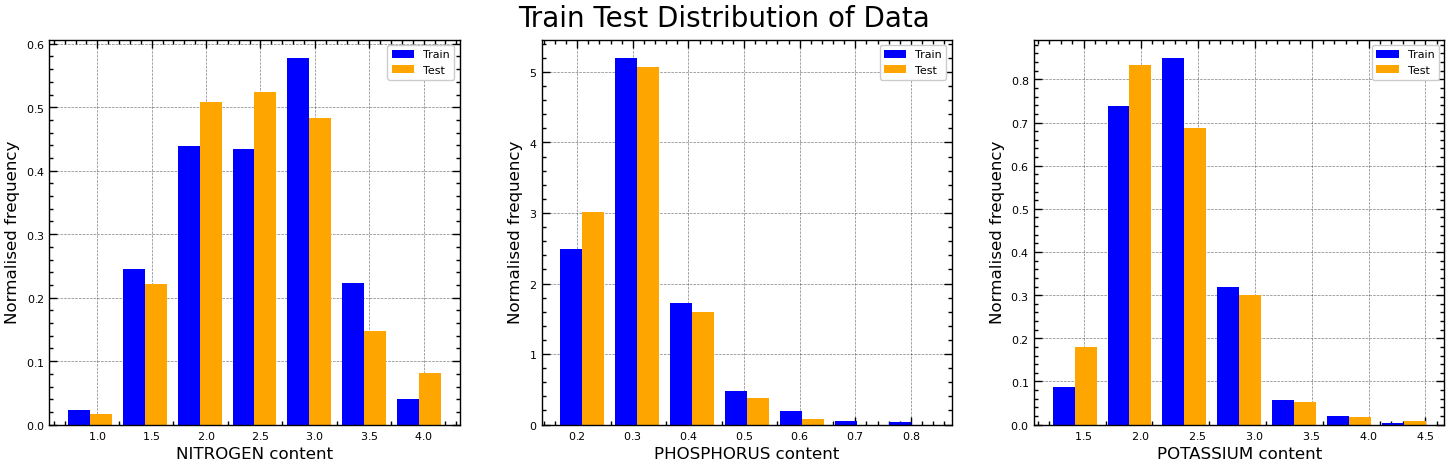

In [79]:
# ## Plotting the Distribution of Train and Test Output Data  -----------for  Nitrogen ----
plt.style.use(['science','notebook','grid'])

fig, ax = plt.subplots(1,3, figsize=(18,5))

minN = np.min(yN)
maxN = np.max(yN)

binsN = np.linspace(minN, maxN, 8)
# density =True : used to normalise bin heights to make the integral of  histogram 1.
ax[0].hist([yN_train, yN_test], binsN , label=['Train', 'Test'], density=True, color = ['blue','orange'])
# results in error when yN_train/ yN_test is data frame or ndarray
ax[0].legend(loc='upper right', fontsize =8)
ax[0].set_xlabel('NITROGEN content',fontsize =12)
ax[0].set_ylabel('Normalised frequency',fontsize =12)
ax[0].tick_params(axis='both', labelsize=8)

minP = np.min(yP)
maxP = np.max(yP)

binsP = np.linspace(minP, maxP, 8)
# density =True : used to normalise bin heights to make the integral of  histogram 1.
ax[1].hist([yP_train, yP_test], binsP , label=['Train', 'Test'], density=True, color = ['blue','orange'])
# results in error when yN_train/ yN_test is data frame or ndarray
ax[1].legend(loc='upper right', fontsize =8)
ax[1].set_xlabel('PHOSPHORUS content', fontsize =12)
ax[1].set_ylabel('Normalised frequency',fontsize =12)
ax[1].tick_params(axis='both', labelsize=8)

minK = np.min(yK)
maxK = np.max(yK)

binsK = np.linspace(minK, maxK, 8)
# density =True : used to normalise bin heights to make the integral of  histogram 1.
ax[2].hist([yK_train, yK_test], binsK , label=['Train', 'Test'], density=True, color = ['blue','orange'])
# results in error when yN_train/ yN_test is data frame or ndarray
ax[2].legend(loc='upper right', fontsize =8)
ax[2].set_xlabel('POTASSIUM content', fontsize =12)
ax[2].set_ylabel('Normalised frequency',fontsize =12)
ax[2].tick_params(axis='both', labelsize=8)

fig.suptitle('Train Test Distribution of Data', x = 0.5 ,y = .95, fontsize = 20)

plt.show()

# Step 4: Training the Model

        - Create a ridge regression object
        - Apply fit function (using created object) on training data
        - Check the weights/parameters generated by fit function 

In [20]:
krr_reg = KernelRidge()

param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 
            'gamma': [5, 2, 1, 0.5, 0.1, 0.01, 0.001]}

scorer = make_scorer(mean_absolute_error, greater_is_better=False)
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=2)
krrN_random = RandomizedSearchCV(krr_reg, param_distributions = param_grid, cv=cv,\
                                scoring=scorer, refit=True, verbose=1, error_score='raise', n_jobs=-1)

krrN_random.fit(XN_train,yN_train)


Fitting 50 folds for each of 10 candidates, totalling 500 fits


RandomizedSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=2),
                   error_score='raise', estimator=KernelRidge(), n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.0005, 0.001, 0.005,
                                                  0.01, 0.05, 0.1, 0.5, 1],
                                        'gamma': [5, 2, 1, 0.5, 0.1, 0.01,
                                                  0.001]},
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False),
                   verbose=1)

In [21]:
krr_reg = KernelRidge()

param_grid={'alpha': [0.00001,0.00005,0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 
            'gamma': [5, 2, 1, 0.5, 0.1,0.05, 0.01, 0.005, 0.001]}

scorer = make_scorer(mean_absolute_error, greater_is_better=False)
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=3)
krrP_random = RandomizedSearchCV(krr_reg, param_distributions = param_grid, cv=cv,\
                                scoring=scorer, refit=True, verbose=1, error_score='raise', n_jobs=-1)

krrP_random.fit(XP_train,yP_train)


Fitting 100 folds for each of 10 candidates, totalling 1000 fits


RandomizedSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=3),
                   error_score='raise', estimator=KernelRidge(), n_jobs=-1,
                   param_distributions={'alpha': [1e-05, 5e-05, 0.0001, 0.0005,
                                                  0.001, 0.005, 0.01, 0.05, 0.1,
                                                  0.5, 1],
                                        'gamma': [5, 2, 1, 0.5, 0.1, 0.05, 0.01,
                                                  0.005, 0.001]},
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False),
                   verbose=1)

In [22]:
krr_reg = KernelRidge()

param_grid={'alpha': [0.00001,0.00005,0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 
            'gamma': [5, 2, 1, 0.5, 0.1,0.05, 0.01, 0.005, 0.001,0.0005,0.0001]}

scorer = make_scorer(mean_absolute_error, greater_is_better=False)
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=2)
krrK_random = RandomizedSearchCV(krr_reg, param_distributions = param_grid, cv=cv,\
                                scoring=scorer, refit=True, verbose=1, error_score='raise', n_jobs=-1)

krrK_random.fit(XK_train,yK_train)


Fitting 100 folds for each of 10 candidates, totalling 1000 fits


RandomizedSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=2),
                   error_score='raise', estimator=KernelRidge(), n_jobs=-1,
                   param_distributions={'alpha': [1e-05, 5e-05, 0.0001, 0.0005,
                                                  0.001, 0.005, 0.01, 0.05, 0.1,
                                                  0.5, 1],
                                        'gamma': [5, 2, 1, 0.5, 0.1, 0.05, 0.01,
                                                  0.005, 0.001, 0.0005,
                                                  0.0001]},
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False),
                   verbose=1)

# Step 5: Prediction on Test Data 

In [23]:
print(krrN_random.best_estimator_)
yN_pred = krrN_random.predict(XN_test)
yN_pred = np.round(yN_pred, 2)


KernelRidge(alpha=0.001, gamma=5)


In [24]:
print(krrP_random.best_estimator_)
yP_pred = krrP_random.predict(XP_test)
yP_pred = np.round(yP_pred, 2)


KernelRidge(alpha=5e-05, gamma=0.05)


In [25]:
print(krrK_random.best_estimator_)
yK_pred = krrK_random.predict(XK_test)
yK_pred = np.round(yK_pred, 2)


KernelRidge(alpha=1e-05, gamma=1)


# Step 6: Model Accuracy and Plots

### Model Accuracy (NITROGEN)

In [26]:
## Implememnt IQRP technique to check the efficiency of the model.------ TODO


#  Mean percentage error for nitrogen
errorsN = np.mean(abs((yN_pred - yN_test)/yN_test))

#  Calculate the rmse for training data Nitrogen
yhatN_pred = krrN_random.predict(XN_train)
mseNTrain = mean_squared_error(yN_train, yhatN_pred)
rmseNTrain = np.sqrt(mseNTrain)
#  Calculate the rmse for testing data Nitrogen
mseNTest = mean_squared_error(yN_test, yN_pred)
rmseNTest = np.sqrt(mseNTest)

print('Nitogen Model Accuracy') 
print('Mean Percentage Error:', errorsN*100)  
print('Root Mean Square Error (Training): %.3f' % rmseNTrain)
print('Root Mean Square Error (Testing): %.3f' % rmseNTest)
print ('Coefficient of determination :', np.round(r2_score(yN_test, yN_pred), 3))

Nitogen Model Accuracy
Mean Percentage Error: 8.684714257448658
Root Mean Square Error (Training): 0.250
Root Mean Square Error (Testing): 0.269
Coefficient of determination : 0.817


In [27]:
# Merging actual and predicted (Test data) in one data frame for plots
yN_tp = pd.DataFrame({'actual':yN_test.values, 'predic': yN_pred})

yN_sortedP = yN_tp.sort_values(by =['predic'])
yN_srtP = yN_sortedP.reset_index(drop=True)

yN_sortedA = yN_tp.sort_values(by =['actual'])
yN_srtA = yN_sortedA.reset_index(drop=True)

In [28]:
# Predition using Model on the "Training Data"
yN_predT = krrN_random.predict(XN_train)
yN_predT = np.round(yN_predT, 2)

# Merging actual and predicted (Train data) in one data frame for plots
yN_TP = pd.DataFrame({'actual':yN_train.values, 'predic': yN_predT})

yN_sortedTP = yN_TP.sort_values(by =['predic'])
yN_srtTP = yN_sortedTP.reset_index(drop=True)

yN_sortedTA = yN_TP.sort_values(by =['actual'])
yN_srtTA = yN_sortedTA.reset_index(drop=True)

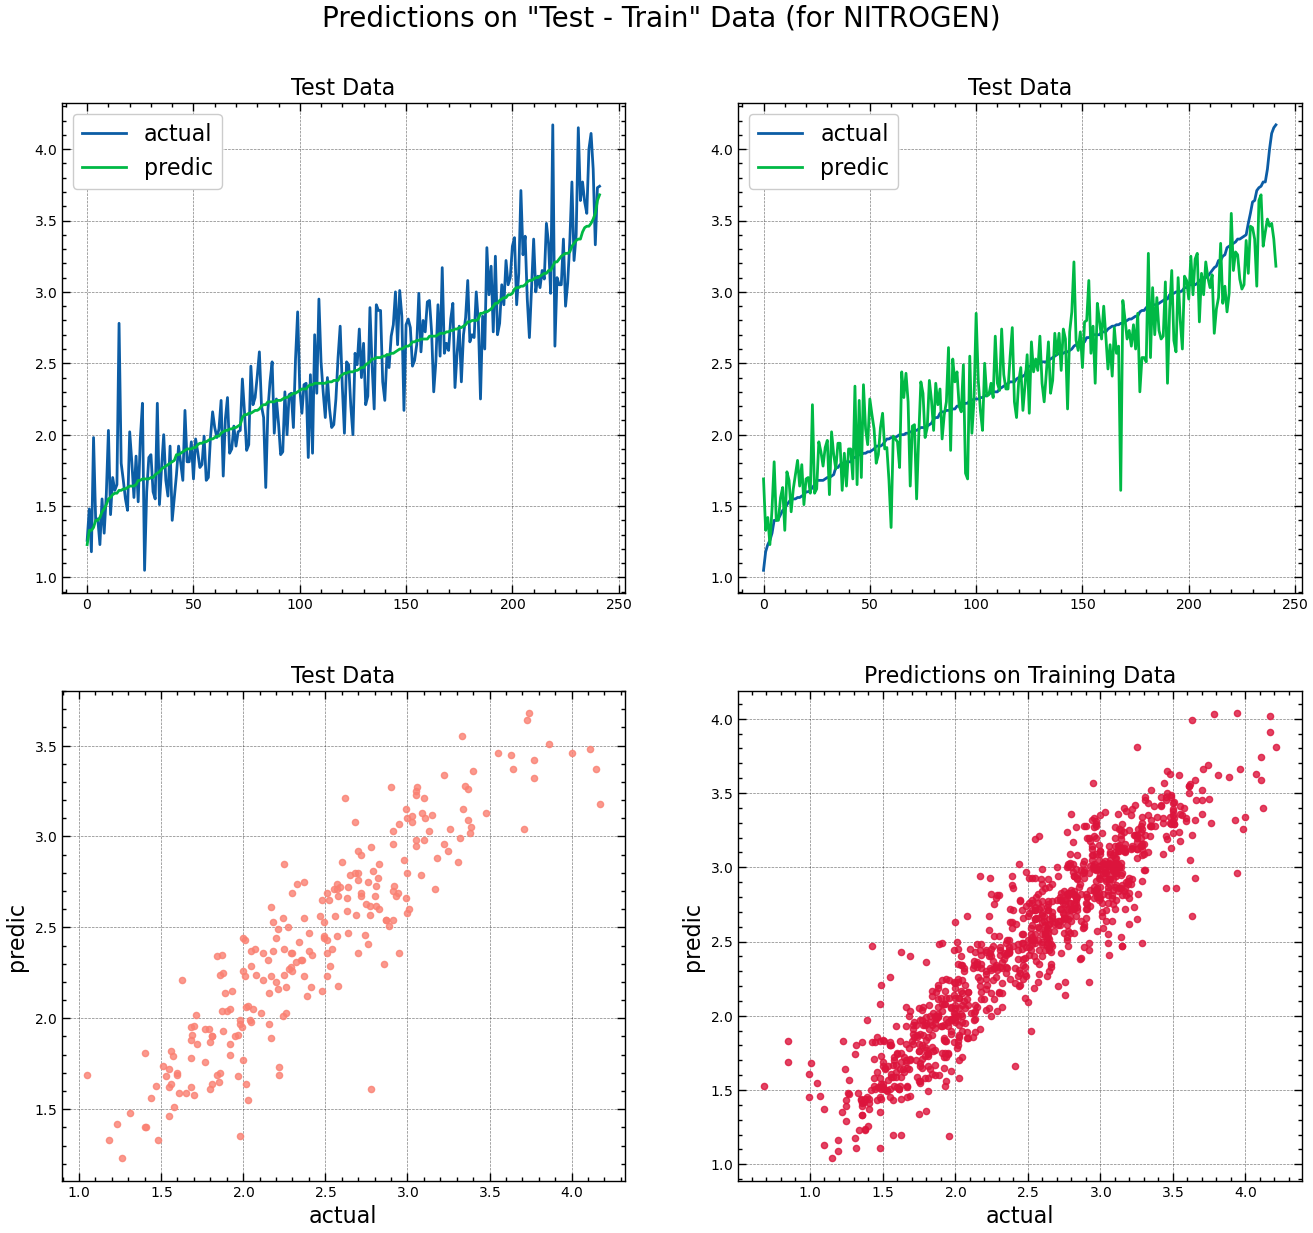

In [29]:
#####  Draw a band around predicted values by using variance in actual values.------ TODO


# Plots for Visualising the Model Accuracy
plt.style.use(['science','notebook','grid'])

fig, axes = plt.subplots(2,2, figsize=(16,14))

yN_srtP.plot(ax= axes[0,0])
axes[0,0].tick_params(axis='both', labelsize=10)
axes[0,0].set_title('Test Data')

yN_srtA.plot(ax= axes[0,1])
axes[0,1].tick_params(axis='both', labelsize=10)
axes[0,1].set_title('Test Data')

yN_srtA.plot.scatter(ax= axes[1,0], x="actual", y="predic", alpha=0.8, color = 'salmon')
axes[1,0].tick_params(axis='both', labelsize=10)
axes[1,0].set_title('Test Data')

# following plot is for prediction on training data
yN_srtTA.plot.scatter(ax= axes[1,1], x="actual", y="predic", alpha=0.8, color = 'crimson')
axes[1,1].tick_params(axis='both', labelsize=10)
axes[1,1].set_title('Predictions on Training Data')

fig.suptitle('Predictions on "Test - Train" Data (for NITROGEN)', x = 0.5 ,y = .95, fontsize=20)
plt.show()

### Model Accuracy (PHOSPHORUS)

In [30]:
#Mean percentage error for phosphorus
errorsP = np.mean(abs((yP_pred - yP_test)/yP_test))

# Calculate the rmse for training data phosphorus
yhatP_pred = krrP_random.predict(XP_train) 
msePTrain = mean_squared_error(yP_train, yhatP_pred)
rmsePTrain = np.sqrt(msePTrain)
# Calculate the rmse for testing data phosphorus
msePTest = mean_squared_error(yP_test, yP_pred)
rmsePTest = np.sqrt(msePTest)
r2P = r2_score(yP_test, yP_pred)

print('Phophorus Model Accuracy')  
print('Mean Percentage Error:', errorsP*100)
print('Phosphorus Root Mean Square Error (Training): %.3f' % rmsePTrain)
print('Phosphorus Root Mean Square Error (Testing): %.3f' % rmsePTest)
print('Coefficient of determination- r2:', r2P) 

Phophorus Model Accuracy
Mean Percentage Error: 13.509386664332922
Phosphorus Root Mean Square Error (Training): 0.056
Phosphorus Root Mean Square Error (Testing): 0.052
Coefficient of determination- r2: 0.49745423452135706


In [31]:
# Merging actual and predicted (Test data) in one data frame for plots
yP_tp = pd.DataFrame({'actual':yP_test.values, 'predic': yP_pred})

yP_sortedP = yP_tp.sort_values(by =['predic'])
yP_srtP = yP_sortedP.reset_index(drop=True)

yP_sortedA = yP_tp.sort_values(by =['actual'])
yP_srtA = yP_sortedA.reset_index(drop=True)

# Predition using Model on the "Training Data"
yP_predT = krrP_random.predict(XP_train)
yP_predT = np.round(yP_predwT, 2)

# Merging actual and predicted (Train data) in one data frame for plots
yP_TP = pd.DataFrame({'actual':yP_train.values, 'predic': yP_predT})

yP_sortedTP = yP_TP.sort_values(by =['predic'])
yP_srtTP = yP_sortedTP.reset_index(drop=True)

yP_sortedTA = yP_TP.sort_values(by =['actual'])
yP_srtTA = yP_sortedTA.reset_index(drop=True)

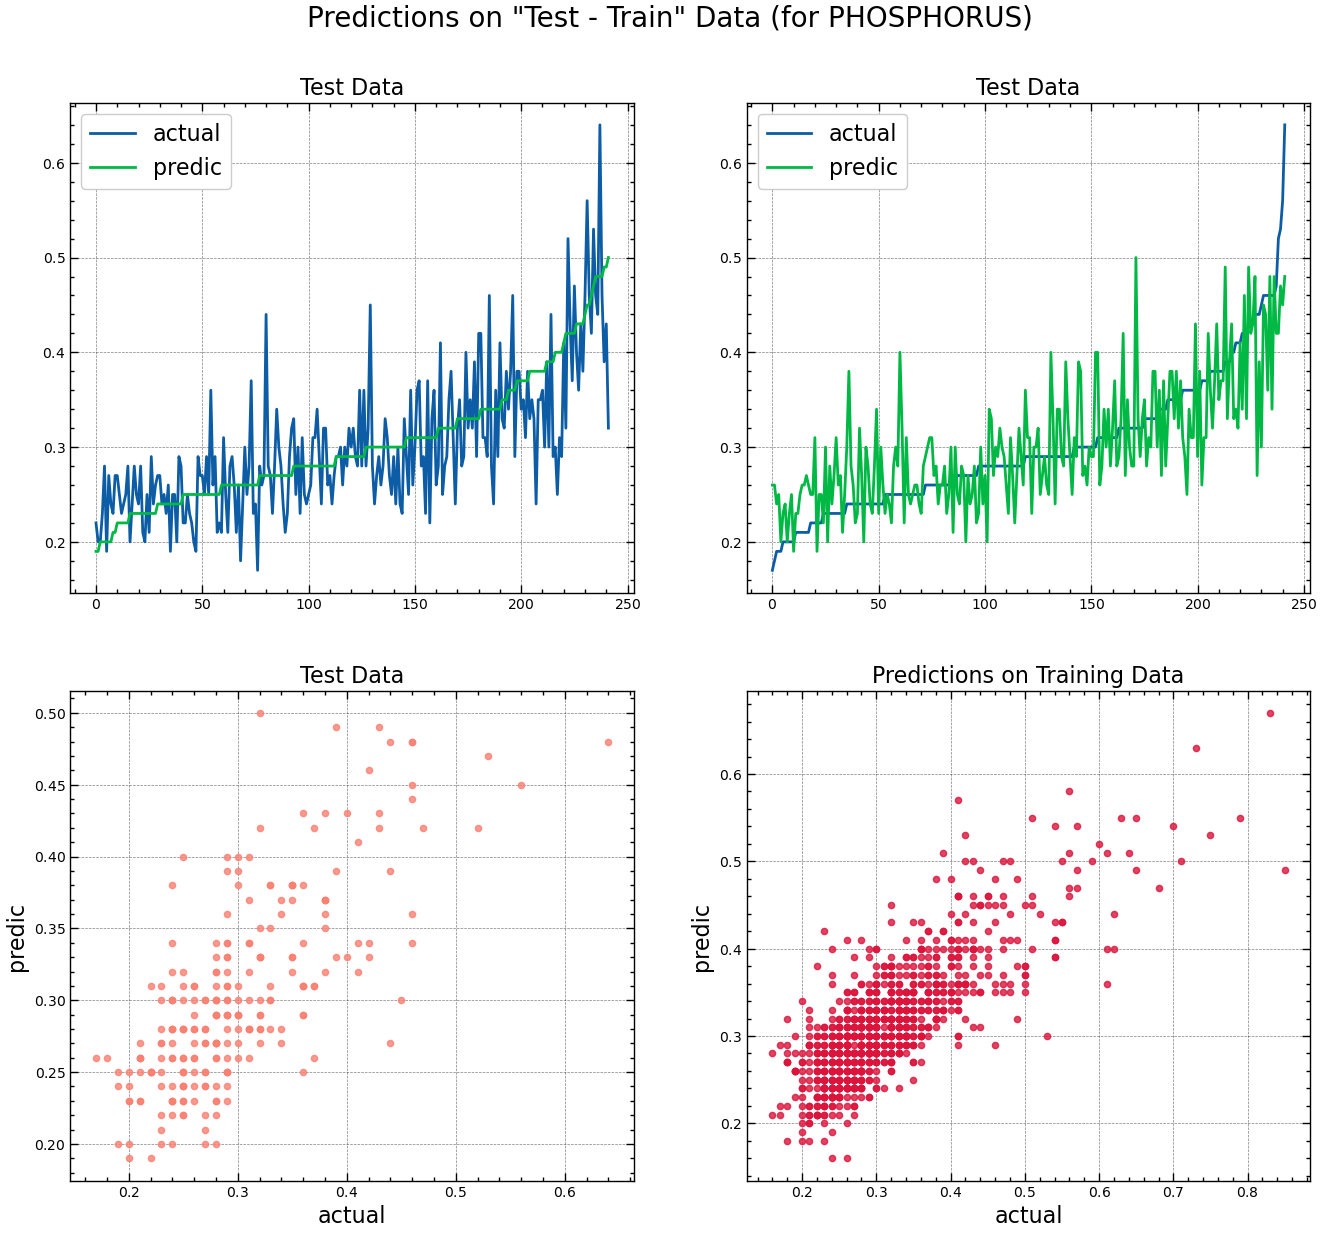

In [32]:
# Plots for Visualising the Model Accuracy
plt.style.use(['science','notebook','grid'])

fig, axes = plt.subplots(2,2, figsize=(16,14))

yP_srtP.plot(ax= axes[0,0])
axes[0,0].tick_params(axis='both', labelsize=10)
axes[0,0].set_title('Test Data')

yP_srtA.plot(ax= axes[0,1])
axes[0,1].tick_params(axis='both', labelsize=10)
axes[0,1].set_title('Test Data')

yP_srtA.plot.scatter(ax= axes[1,0], x="actual", y="predic", alpha=0.8, color = 'salmon')
axes[1,0].tick_params(axis='both', labelsize=10)
axes[1,0].set_title('Test Data')

# following plot is for prediction on training data
yP_srtTA.plot.scatter(ax= axes[1,1], x="actual", y="predic", alpha=0.8, color = 'crimson')
axes[1,1].tick_params(axis='both', labelsize=10)
axes[1,1].set_title('Predictions on Training Data')

fig.suptitle('Predictions on "Test - Train" Data (for PHOSPHORUS)', x = 0.5 ,y = .95, fontsize=20)
plt.show()

### Model Accuracy (POTASSIUM)

In [33]:
#Mean percentage error for potassium
errorsK = np.mean(abs((yK_pred - yK_test)/yK_test))

# Calculate the rmse for training data potassium
yhatK_pred = krrK_random.predict(XK_train)
mseKTrain = mean_squared_error(yK_train, yhatK_pred)
rmseKTrain = np.sqrt(mseKTrain)
# Calculate the rmse for testing data potassium
mseKTest = mean_squared_error(yK_test, yK_pred)
rmseKTest = np.sqrt(mseKTest)
r2K = r2_score(yK_test, yK_pred)

print('Potassium Model Accuracy')  
print('Mean Percentage Error:', errorsK*100) 
print('Potassium Root Mean Square Error (Training): %.3f' % rmseKTrain)
print('Potassium Root Mean Square Error (Testing): %.3f' % rmseKTest)
print('Coefficient of determination- r2:', r2K)

Potassium Model Accuracy
Mean Percentage Error: 10.509055086103949
Potassium Root Mean Square Error (Training): 0.192
Potassium Root Mean Square Error (Testing): 0.302
Coefficient of determination- r2: 0.5459638004426834


In [34]:
# Merging actual and predicted (Test data) in one data frame for plots
yK_tp = pd.DataFrame({'actual':yK_test.values, 'predic': yK_pred})

yK_sortedP = yK_tp.sort_values(by =['predic'])
yK_srtP = yK_sortedP.reset_index(drop=True)

yK_sortedA = yK_tp.sort_values(by =['actual'])
yK_srtA = yK_sortedA.reset_index(drop=True)

# Predition using Model on the "Training Data"
yK_predT = krrK_random.predict(XK_train)
yK_predT = np.round(yK_predT, 2)

# Merging actual and predicted (Train data) in one data frame for plots
yK_TP = pd.DataFrame({'actual':yK_train.values, 'predic': yK_predT})

yK_sortedTP = yK_TP.sort_values(by =['predic'])
yK_srtTP = yK_sortedTP.reset_index(drop=True)

yK_sortedTA = yK_TP.sort_values(by =['actual'])
yK_srtTA = yK_sortedTA.reset_index(drop=True)

<IPython.core.display.Javascript object>


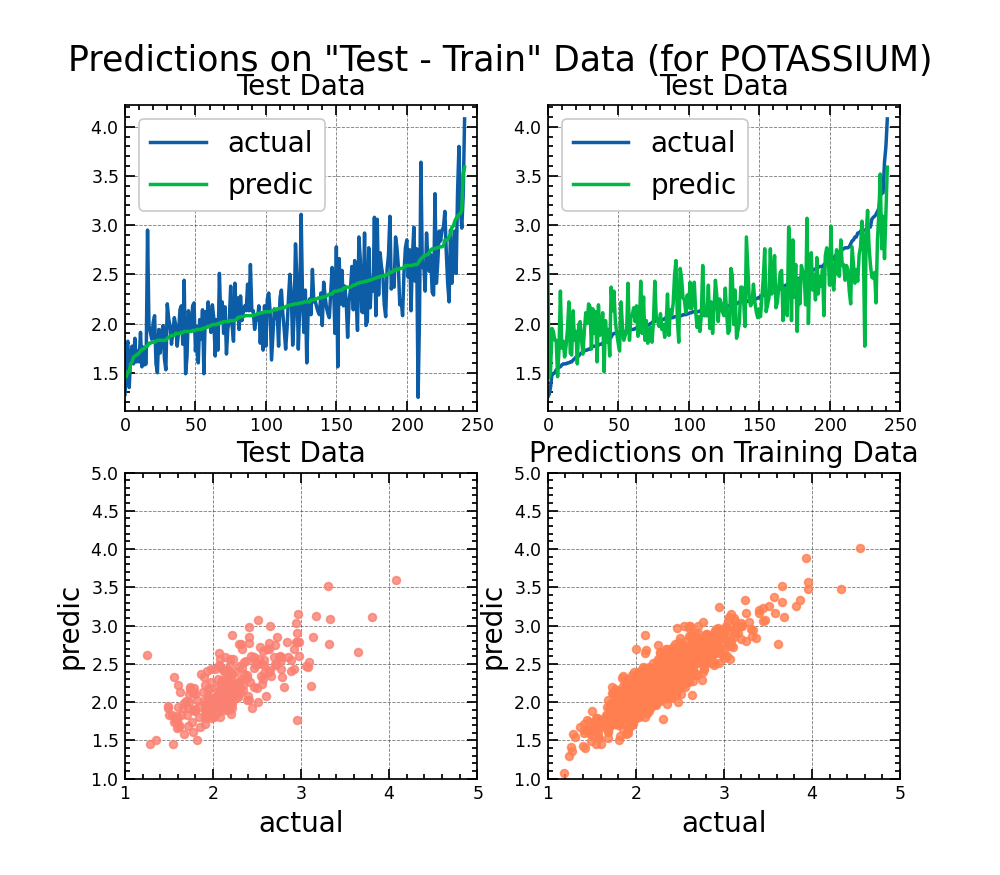

In [102]:
# 
# Plots for Visualising the Model Accuracy
plt.style.use(['science','notebook','grid'])

fig, axes = plt.subplots(2,2, figsize=(8,7))

yK_srtP.plot(ax= axes[0,0])
axes[0,0].tick_params(axis='both', labelsize=10)
axes[0,0].set_xlim([0,250])
axes[0,0].set_title('Test Data')

yK_srtA.plot(ax= axes[0,1])
axes[0,1].tick_params(axis='both', labelsize=10)
axes[0,1].set_xlim([0,250])
axes[0,1].set_title('Test Data')


# fit and display a regression line on the scattered points --- TODO
yK_srtA.plot.scatter(ax= axes[1,0], x="actual", y="predic", alpha=0.8, color = 'salmon')
axes[1,0].tick_params(axis='both', labelsize=10)
axes[1,0].set_xlim([1,5])
axes[1,0].set_ylim([1,5])
axes[1,0].set_title('Test Data')

# following plot is for prediction on training data
yK_srtTA.plot.scatter(ax= axes[1,1], x="actual", y="predic", alpha=0.8, color = 'coral')
axes[1,1].tick_params(axis='both', labelsize=10)
axes[1,1].set_xlim([1,5])
axes[1,1].set_ylim([1,5])
axes[1,1].set_title('Predictions on Training Data')

fig.suptitle('Predictions on "Test - Train" Data (for POTASSIUM)', x = 0.5 ,y = .95, fontsize=20)
plt.show()

# Training on Lasso Regression

In [66]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso()

param_grid={'alpha': [0.00005,0.0005,0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 
            'tol': [0.12, 0.14, 0.15, 0.16,0.17, 0.18,0.20], 'selection': ['random','cyclic'],  'max_iter': [1000]}

scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=2)
lassoN_random = RandomizedSearchCV(lasso_reg, param_distributions = param_grid, cv = cv, random_state=10,\
                          scoring = scorer, refit=True, n_iter=100)

lassoN_random.fit(XN_train, yN_train)

RandomizedSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=2),
                   estimator=Lasso(), n_iter=100,
                   param_distributions={'alpha': [5e-05, 0.0005, 0.0001, 0.001,
                                                  0.005, 0.01, 0.05, 0.1, 0.5,
                                                  1],
                                        'max_iter': [1000],
                                        'selection': ['random', 'cyclic'],
                                        'tol': [0.12, 0.14, 0.15, 0.16, 0.17,
                                                0.18, 0.2]},
                   random_state=10,
                   scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [67]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso()

param_grid={'alpha': [0.00005,0.0005,0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 
            'tol': [0.12, 0.14, 0.15, 0.16,0.17, 0.18,0.20], 'selection': ['random','cyclic'],  'max_iter': [1000]}

scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=2)
lassoP_random = RandomizedSearchCV(lasso_reg, param_distributions = param_grid, cv = cv, random_state=10,\
                          scoring = scorer, refit=True, n_iter=100)

lassoP_random.fit(XP_train, yP_train)

RandomizedSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=2),
                   estimator=Lasso(), n_iter=100,
                   param_distributions={'alpha': [5e-05, 0.0005, 0.0001, 0.001,
                                                  0.005, 0.01, 0.05, 0.1, 0.5,
                                                  1],
                                        'max_iter': [1000],
                                        'selection': ['random', 'cyclic'],
                                        'tol': [0.12, 0.14, 0.15, 0.16, 0.17,
                                                0.18, 0.2]},
                   random_state=10,
                   scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [68]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso()

param_grid={'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 
            'tol': [0.12, 0.14, 0.15, 0.16,0.17, 0.18,0.20], 'selection': ['random','cyclic'],  'max_iter': [1000]}

scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=2)
lassoK_random = RandomizedSearchCV(lasso_reg, param_distributions = param_grid, cv = cv, random_state=10,\
                          scoring = scorer, refit=True, n_iter=100)

lassoK_random.fit(XK_train, yK_train)

RandomizedSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=2),
                   estimator=Lasso(), n_iter=100,
                   param_distributions={'alpha': [0.0001, 0.001, 0.005, 0.01,
                                                  0.05, 0.1, 0.5, 1],
                                        'max_iter': [1000],
                                        'selection': ['random', 'cyclic'],
                                        'tol': [0.12, 0.14, 0.15, 0.16, 0.17,
                                                0.18, 0.2]},
                   random_state=10,
                   scoring=make_scorer(mean_squared_error, greater_is_better=False))

# Prediction on Test Data

In [69]:
print(lassoN_random.best_estimator_)
yN_pred = lassoN_random.predict(XN_test)
yN_pred = np.round(yN_pred, 2)

Lasso(alpha=5e-05, selection='random', tol=0.16)


In [88]:
print(lassoP_random.best_estimator_)
yP_pred = lassoP_random.predict(XP_test)
yP_pred = np.round(yN_pred, 2)

Lasso(alpha=5e-05, selection='random', tol=0.17)


In [89]:
print(lassoK_random.best_estimator_)
yK_pred = lassoK_random.predict(XK_test)
yK_pred = np.round(yK_pred, 2)

Lasso(alpha=0.0001, selection='random', tol=0.17)


# Model Accuracy and Plots

### Model Accuracy (NITROGEN)

In [72]:
#  Mean percentage error for nitrogen
errorsN = np.mean(abs((yN_pred - yN_test)/yN_test))

#  Calculate the rmse for training data Nitrogen
yhatN_pred = lassoN_random.predict(XN_train)
mseNTrain = mean_squared_error(yN_train, yhatN_pred)
rmseNTrain = np.sqrt(mseNTrain)

#  Calculate the rmse for testing data Nitrogen
mseNTest = mean_squared_error(yN_test, yN_pred)
rmseNTest = np.sqrt(mseNTest)

print('Nitogen Model Accuracy')    
print('Nitrogen Root Mean Square Error (Training): %.3f' % rmseNTrain)
print('Nitrogen Root Mean Square Error (Testing): %.3f' % rmseNTest)
print ("Test Nitrogen R2 Score", np.round(r2_score(yN_test, yN_pred), 3))
print('Mean Percentage Error:', errorsN*100)   

Nitogen Model Accuracy
Nitrogen Root Mean Square Error (Training): 0.341
Nitrogen Root Mean Square Error (Testing): 0.349
Test Nitrogen R2 Score 0.693
Mean Percentage Error: 12.047602035299706


In [73]:
# Merging actual and predicted (Test data) in one data frame for plots
yN_tp = pd.DataFrame({'actual':yN_test.values, 'predic': yN_pred})

yN_sortedP = yN_tp.sort_values(by =['predic'])
yN_srtP = yN_sortedP.reset_index(drop=True)

yN_sortedA = yN_tp.sort_values(by =['actual'])
yN_srtA = yN_sortedA.reset_index(drop=True)

In [74]:
# Predition using Model on the "Training Data"
yN_predT = lassoN_random.predict(XN_train)
yN_predT = np.round(yN_predT, 2)

# Merging actual and predicted (Train data) in one data frame for plots
yN_TP = pd.DataFrame({'actual':yN_train.values, 'predic': yN_predT})

yN_sortedTP = yN_TP.sort_values(by =['predic'])
yN_srtTP = yN_sortedTP.reset_index(drop=True)

yN_sortedTA = yN_TP.sort_values(by =['actual'])
yN_srtTA = yN_sortedTA.reset_index(drop=True)

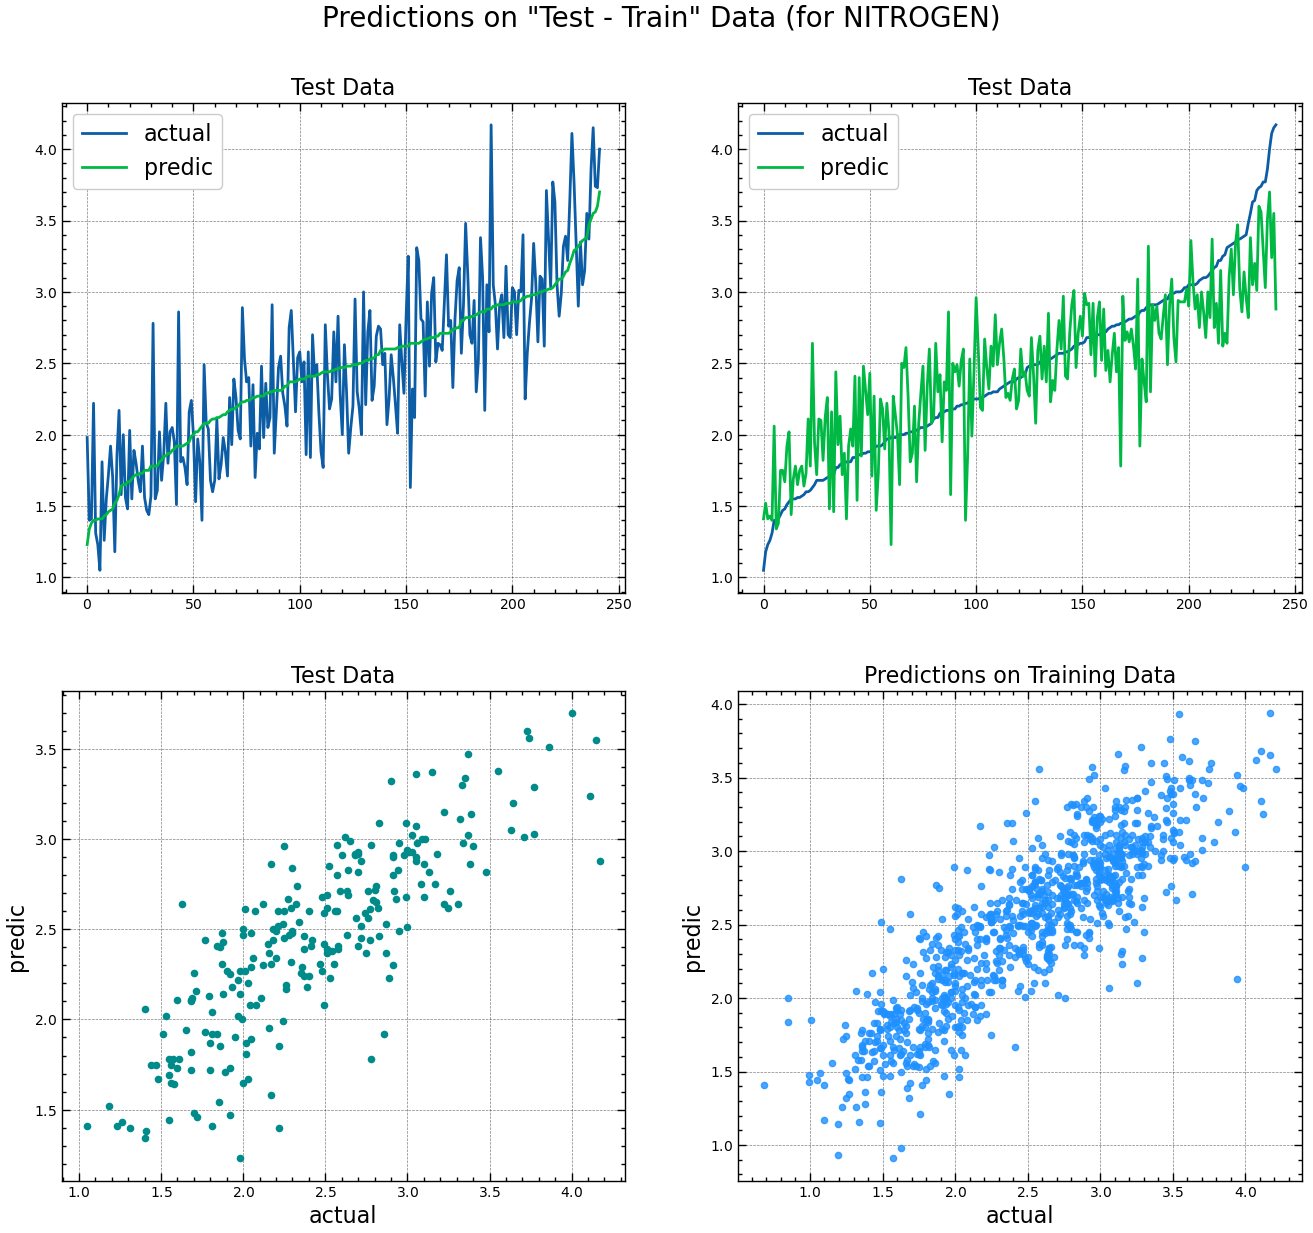

In [75]:
# Plots for Visualising the Model Accuracy
plt.style.use(['science','notebook','grid'])

fig, axes = plt.subplots(2,2, figsize=(16,14))

yN_srtP.plot(ax= axes[0,0])
axes[0,0].tick_params(axis='both', labelsize=10)
axes[0,0].set_title('Test Data')

yN_srtA.plot(ax= axes[0,1])
axes[0,1].tick_params(axis='both', labelsize=10)
axes[0,1].set_title('Test Data')

yN_srtA.plot.scatter(ax= axes[1,0], x="actual", y="predic", alpha=1.0, color = 'darkcyan')
axes[1,0].tick_params(axis='both', labelsize=10)
axes[1,0].set_title('Test Data')

# following plot is for prediction on training data
yN_srtTA.plot.scatter(ax= axes[1,1], x="actual", y="predic", alpha=0.8, color = 'dodgerblue')
axes[1,1].tick_params(axis='both', labelsize=10)
axes[1,1].set_title('Predictions on Training Data')

fig.suptitle('Predictions on "Test - Train" Data (for NITROGEN)', x = 0.5 ,y = .95, fontsize=20)
plt.show()

### Model Accuracy (PHOSPHORUS)

In [90]:
#Mean percentage error for phosphorus
errorsP = np.mean(abs((yP_pred - yP_test)/yP_test))

# Calculate the rmse for training data phosphorus
yhatP_pred = lassoP_random.predict(XP_train) 
msePTrain = mean_squared_error(yP_train, yhatP_pred)
rmsePTrain = np.sqrt(msePTrain)
# Calculate the rmse for testing data phosphorus
msePTest = mean_squared_error(yP_test, yP_pred)
rmsePTest = np.sqrt(msePTest)
r2P = r2_score(yP_test, yP_pred)

print('Phophorus Model Accuracy')  
print('Mean Percentage Error:', errorsP*100)
print('Phosphorus Root Mean Square Error (Training): %.3f' % rmsePTrain)
print('Phosphorus Root Mean Square Error (Testing): %.3f' % rmsePTest)
print('Coefficient of determination- r2:', r2P) 

Phophorus Model Accuracy
Mean Percentage Error: 749.5738820257676
Phosphorus Root Mean Square Error (Training): 0.082
Phosphorus Root Mean Square Error (Testing): 2.200
Coefficient of determination- r2: -909.2995063935637


In [83]:
# Merging actual and predicted (Test data) in one data frame for plots
yP_tp = pd.DataFrame({'actual':yP_test.values, 'predic': yP_pred})

yP_sortedP = yP_tp.sort_values(by =['predic'])
yP_srtP = yP_sortedP.reset_index(drop=True)

yP_sortedA = yP_tp.sort_values(by =['actual'])
yP_srtA = yP_sortedA.reset_index(drop=True)

# Predition using Model on the "Training Data"
yP_predT = lassoP_random.predict(XP_train)
yP_predT = np.round(yP_predT, 2)

# Merging actual and predicted (Train data) in one data frame for plots
yP_TP = pd.DataFrame({'actual':yP_train.values, 'predic': yP_predT})

yP_sortedTP = yP_TP.sort_values(by =['predic'])
yP_srtTP = yP_sortedTP.reset_index(drop=True)

yP_sortedTA = yP_TP.sort_values(by =['actual'])
yP_srtTA = yP_sortedTA.reset_index(drop=True)

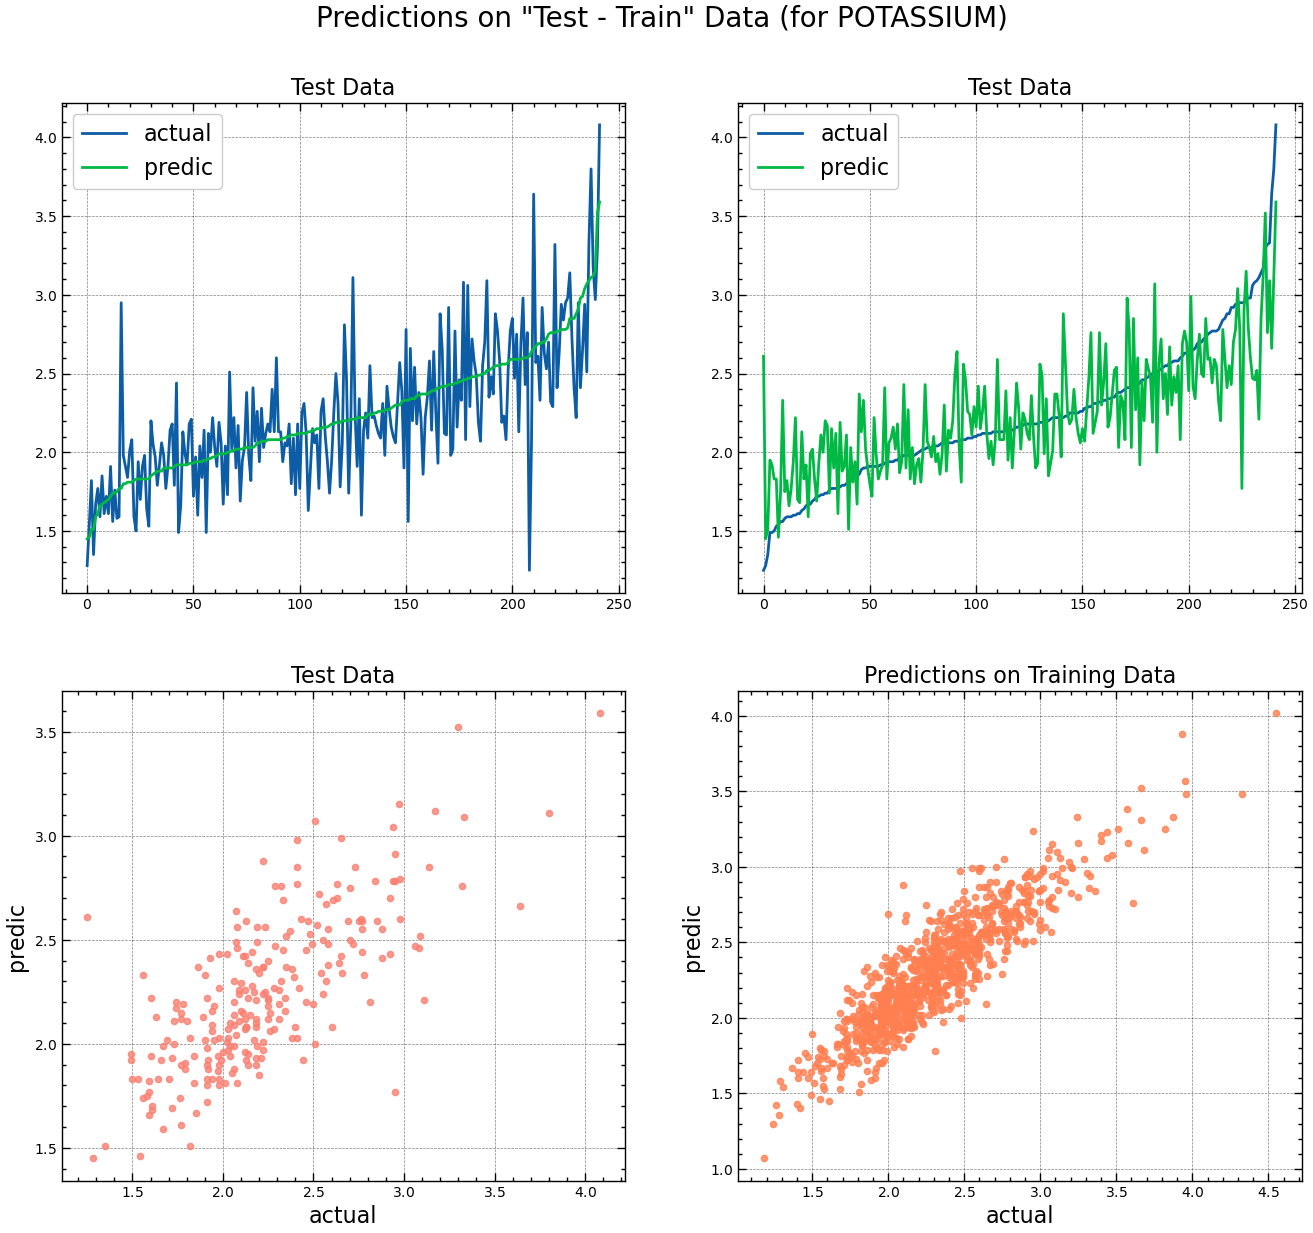

In [84]:
# Plots for Visualising the Model Accuracy
plt.style.use(['science','notebook','grid'])

fig, axes = plt.subplots(2,2, figsize=(16,14))

yK_srtP.plot(ax= axes[0,0])
axes[0,0].tick_params(axis='both', labelsize=10)
axes[0,0].set_title('Test Data')

yK_srtA.plot(ax= axes[0,1])
axes[0,1].tick_params(axis='both', labelsize=10)
axes[0,1].set_title('Test Data')

yK_srtA.plot.scatter(ax= axes[1,0], x="actual", y="predic", alpha=0.8, color = 'salmon')
axes[1,0].tick_params(axis='both', labelsize=10)
axes[1,0].set_title('Test Data')

# following plot is for prediction on training data
yK_srtTA.plot.scatter(ax= axes[1,1], x="actual", y="predic", alpha=0.8, color = 'coral')
axes[1,1].tick_params(axis='both', labelsize=10)
axes[1,1].set_title('Predictions on Training Data')

fig.suptitle('Predictions on "Test - Train" Data (for POTASSIUM)', x = 0.5 ,y = .95, fontsize=20)
plt.show()

### Model Accuracy (POTASSIUM)

In [91]:
#Mean percentage error for potassium
errorsK = np.mean(abs((yK_pred - yK_test)/yK_test))

# Calculate the rmse for training data potassium
yhatK_pred = lassoK_random.predict(XK_train)
mseKTrain = mean_squared_error(yK_train, yhatK_pred)
rmseKTrain = np.sqrt(mseKTrain)
# Calculate the rmse for testing data potassium
mseKTest = mean_squared_error(yK_test, yK_pred)
rmseKTest = np.sqrt(mseKTest)
r2K = r2_score(yK_test, yK_pred)

print('Potassium Model Accuracy')  
print('Mean Percentage Error:', errorsK*100) 
print('Potassium Root Mean Square Error (Training): %.3f' % rmseKTrain)
print('Potassium Root Mean Square Error (Testing): %.3f' % rmseKTest)
print('Coefficient of determination- r2:', r2K)

Potassium Model Accuracy
Mean Percentage Error: 14.271222896790897
Potassium Root Mean Square Error (Training): 0.355
Potassium Root Mean Square Error (Testing): 0.393
Coefficient of determination- r2: 0.2332885914883398


In [ ]:
# Merging actual and predicted (Test data) in one data frame for plots
yK_tp = pd.DataFrame({'actual':yK_test.values, 'predic': yK_pred})

yK_sortedP = yK_tp.sort_values(by =['predic'])
yK_srtP = yK_sortedP.reset_index(drop=True)

yK_sortedA = yK_tp.sort_values(by =['actual'])
yK_srtA = yK_sortedA.reset_index(drop=True)

# Predition using Model on the "Training Data"
yK_predT = krrK_random.predict(XK_train)
yK_predT = np.round(yK_predT, 2)

# Merging actual and predicted (Train data) in one data frame for plots
yK_TP = pd.DataFrame({'actual':yK_train.values, 'predic': yK_predT})

yK_sortedTP = yK_TP.sort_values(by =['predic'])
yK_srtTP = yK_sortedTP.reset_index(drop=True)

yK_sortedTA = yK_TP.sort_values(by =['actual'])
yK_srtTA = yK_sortedTA.reset_index(drop=True)

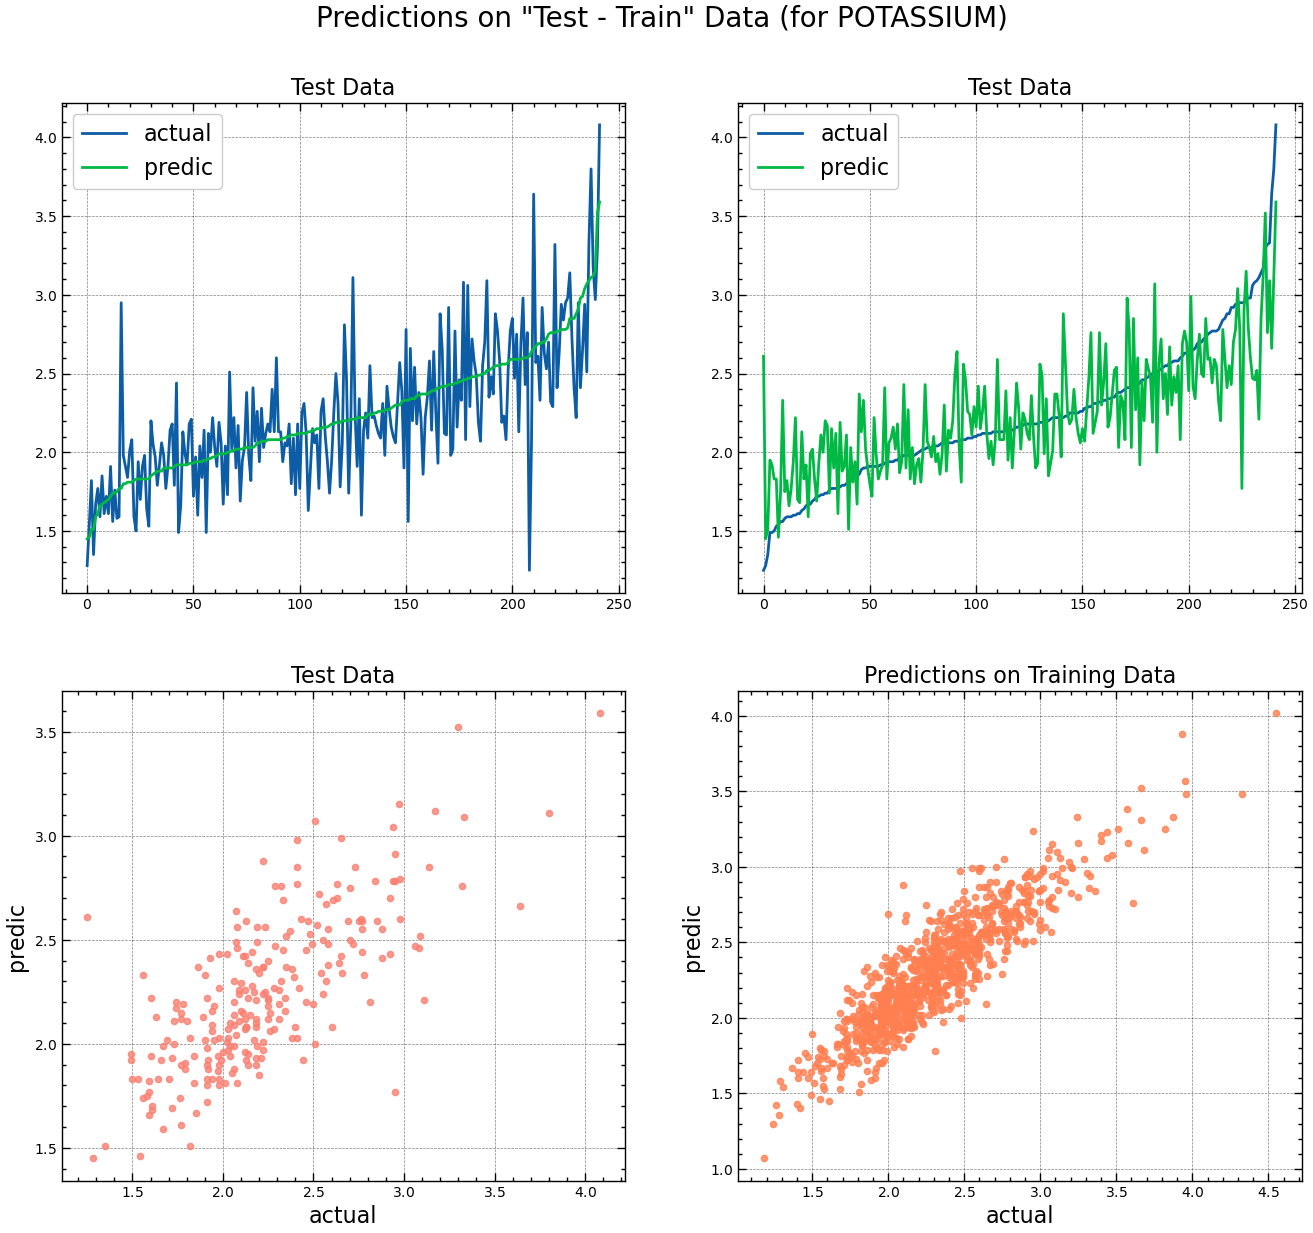

In [86]:
# Plots for Visualising the Model Accuracy
plt.style.use(['science','notebook','grid'])

fig, axes = plt.subplots(2,2, figsize=(16,14))

yK_srtP.plot(ax= axes[0,0])
axes[0,0].tick_params(axis='both', labelsize=10)
axes[0,0].set_title('Test Data')

yK_srtA.plot(ax= axes[0,1])
axes[0,1].tick_params(axis='both', labelsize=10)
axes[0,1].set_title('Test Data')

yK_srtA.plot.scatter(ax= axes[1,0], x="actual", y="predic", alpha=0.8, color = 'salmon')
axes[1,0].tick_params(axis='both', labelsize=10)
axes[1,0].set_title('Test Data')

# following plot is for prediction on training data
yK_srtTA.plot.scatter(ax= axes[1,1], x="actual", y="predic", alpha=0.8, color = 'coral')
axes[1,1].tick_params(axis='both', labelsize=10)
axes[1,1].set_title('Predictions on Training Data')

fig.suptitle('Predictions on "Test - Train" Data (for POTASSIUM)', x = 0.5 ,y = .95, fontsize=20)
plt.show()